In [15]:
import simpy
import random
import matplotlib.pyplot as plt
from tabulate import tabulate

In [1]:
import simpy
import random

class CrosswalkSimulation:
    def __init__(self):
        self.env = simpy.Environment()
        self.cycle = {
            'red': 60,
            'yellow': 5,
            'green': 30
        }
        self.qPedXing = simpy.Resource(self.env, capacity=1)
        self.qCarXing = simpy.Resource(self.env, capacity=1)
        self.statistics = {
            'pedestrian_waiting_times': [],
            'car_waiting_times': [],
            'system_times': [],
            'arrival_times': [],
            'traffic_light_changes': []
        }
        self.last_arrival_time = 0

    def pedestrian(self, name):
        arrival_time = self.env.now
        with self.qPedXing.request() as request:
            yield request
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            self.statistics['pedestrian_waiting_times'].append(waiting_time)
            self.statistics['system_times'].append(crossing_time)
            self.statistics['arrival_times'].append(arrival_time)
            print(f"Pedestrian {name} is crossing the road at time {self.env.now}")

    def car(self, name):
        arrival_time = self.env.now
        with self.qCarXing.request() as request:
            yield request
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            self.statistics['car_waiting_times'].append(waiting_time)
            self.statistics['system_times'].append(crossing_time)
            self.statistics['arrival_times'].append(arrival_time)
            print(f"Car {name} is crossing the road at time {self.env.now}")

    def traffic_light(self):
        while True:
            yield self.env.timeout(self.cycle['red'])
            print(f"Traffic light changed to red at time {self.env.now}")
            self.statistics['traffic_light_changes'].append(('red', self.env.now))
            
            yield self.env.timeout(self.cycle['yellow'])
            print(f"Traffic light changed to yellow at time {self.env.now}")
            self.statistics['traffic_light_changes'].append(('yellow', self.env.now))

            yield self.env.timeout(self.cycle['green'])
            print(f"Traffic light changed to green at time {self.env.now}")
            self.statistics['traffic_light_changes'].append(('green', self.env.now))

    def run_simulation(self, num_cars, num_pedestrians, simulation_time):
        pedestrian_id = 1
        car_id = 1

        for _ in range(num_cars):
            self.env.process(self.car(car_id))
            car_id += 1

        for _ in range(num_pedestrians):
            self.env.process(self.pedestrian(pedestrian_id))
            pedestrian_id += 1

        self.env.process(self.traffic_light())
        self.env.run(until=simulation_time)

# Example usage
simulation = CrosswalkSimulation()
simulation.run_simulation(num_cars=100, num_pedestrians=100, simulation_time=200)

# Display statistics
avg_pedestrian_waiting_time = sum(simulation.statistics['pedestrian_waiting_times']) / len(simulation.statistics['pedestrian_waiting_times'])
avg_car_waiting_time = sum(simulation.statistics['car_waiting_times']) / len(simulation.statistics['car_waiting_times'])
avg_system_time = sum(simulation.statistics['system_times']) / len(simulation.statistics['system_times'])
avg_interarrival_time = simulation.last_arrival_time / len(simulation.statistics['arrival_times'])
utilization_ws = avg_system_time / simulation.env.now
waiting_time_wq = avg_system_time - avg_interarrival_time

print(f"\nSimulation Statistics:")
print(f"Average Pedestrian Waiting Time: {avg_pedestrian_waiting_time:.2f} seconds")
print(f"Average Car Waiting Time: {avg_car_waiting_time:.2f} seconds")
print(f"Average System Time: {avg_system_time:.2f} seconds")
print(f"Average Inter-arrival Time: {avg_interarrival_time:.2f} seconds")
print(f"Utilization (WS): {utilization_ws:.2%}")
print(f"Waiting Time in Queue (WQ): {waiting_time_wq:.2f} seconds")

# Display traffic light changes
print("\nTraffic Light Changes:")
for light, time in simulation.statistics['traffic_light_changes']:
    print(f"{light.capitalize()} light at time {time}")


Pedestrian 1 is crossing the road at time 0.6961372897625846
Car 1 is crossing the road at time 1.476725697448099
Pedestrian 2 is crossing the road at time 2.079445213210709
Car 2 is crossing the road at time 2.999220089022854
Pedestrian 3 is crossing the road at time 3.2371359068319068
Car 3 is crossing the road at time 4.187282912495038
Pedestrian 4 is crossing the road at time 4.70664991160514
Pedestrian 5 is crossing the road at time 5.20830343957878
Car 4 is crossing the road at time 5.896867158644769
Car 5 is crossing the road at time 6.560258788537455
Pedestrian 6 is crossing the road at time 6.837870433245059
Car 6 is crossing the road at time 7.106141488325556
Pedestrian 7 is crossing the road at time 7.2564465826182065
Pedestrian 8 is crossing the road at time 8.046193986569477
Car 7 is crossing the road at time 8.264581088218492
Pedestrian 9 is crossing the road at time 9.203842244638084
Car 8 is crossing the road at time 9.295206425752509
Pedestrian 10 is crossing the road 

In [52]:
import simpy
import random

class CrosswalkSimulation:
    def __init__(self):
        self.env = simpy.Environment()
        self.cycle = {
            'red': 60,
            'yellow': 5,
            'green': 30
        }
        self.qPedXing = simpy.Resource(self.env, capacity=1)
        self.qCarXing = simpy.Resource(self.env, capacity=1)
        self.statistics = {
            'pedestrian_waiting_times': [],
            'car_waiting_times': [],
            'system_times': [],
            'arrival_times': [],
            'traffic_light_changes': []
        }
        self.last_arrival_time = 0

    def pedestrian(self, name):
        arrival_time = self.env.now
        with self.qPedXing.request() as request:
            yield request
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            self.statistics['pedestrian_waiting_times'].append(waiting_time)
            self.statistics['system_times'].append(crossing_time)
            self.statistics['arrival_times'].append(arrival_time)
            print(f"Pedestrian {name} crossed the road at time {self.env.now:.2f}")

    def car(self, name):
        arrival_time = self.env.now
        with self.qCarXing.request() as request:
            yield request
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            self.statistics['car_waiting_times'].append(waiting_time)
            self.statistics['system_times'].append(crossing_time)
            self.statistics['arrival_times'].append(arrival_time)
            print(f"Car {name} crossed the road at time {self.env.now:.2f}")

    def traffic_light(self):
        while True:
            yield self.env.timeout(self.cycle['red'])
            print(f"Traffic light changed to RED at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('RED', self.env.now))
            
            yield self.env.timeout(self.cycle['yellow'])
            print(f"Traffic light changed to YELLOW at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('YELLOW', self.env.now))

            yield self.env.timeout(self.cycle['green'])
            print(f"Traffic light changed to GREEN at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('GREEN', self.env.now))

    def run_simulation(self, num_cars, num_pedestrians, simulation_time):
        pedestrian_id = 1
        car_id = 1

        for _ in range(num_cars):
            self.env.process(self.car(car_id))
            car_id += 1

        for _ in range(num_pedestrians):
            self.env.process(self.pedestrian(pedestrian_id))
            pedestrian_id += 1

        self.env.process(self.traffic_light())
        self.env.run(until=simulation_time)
        
        return self.statistics


# Test Method
simulation = CrosswalkSimulation()
simulation.run_simulation(num_cars=100, num_pedestrians=100, simulation_time=120)

# Display statistics
avg_pedestrian_waiting_time = sum(simulation.statistics['pedestrian_waiting_times']) / len(simulation.statistics['pedestrian_waiting_times'])
avg_car_waiting_time = sum(simulation.statistics['car_waiting_times']) / len(simulation.statistics['car_waiting_times'])
avg_system_time = sum(simulation.statistics['system_times']) / len(simulation.statistics['system_times'])
avg_interarrival_time = simulation.last_arrival_time / len(simulation.statistics['arrival_times'])
utilization_ws = avg_system_time / simulation.env.now
waiting_time_wq = avg_system_time - avg_interarrival_time
longest_car_wait = max(simulation.statistics['car_waiting_times'], default=0)
longest_pedestrian_wait = max(simulation.statistics['pedestrian_waiting_times'], default=0)

print(f"\nSimulation Statistics:")
print(f"Average Pedestrian Waiting Time: {avg_pedestrian_waiting_time:.2f} seconds")
print(f"Average Car Waiting Time: {avg_car_waiting_time:.2f} seconds")
print(f"Average System Time: {avg_system_time:.2f} seconds")
print(f"Average Inter-arrival Time: {avg_interarrival_time:.2f} seconds")
print(f"Utilization (WS): {utilization_ws:.2%}")
print(f"Waiting Time in Queue (WQ): {waiting_time_wq:.2f} seconds")
print("\nAdditional Statistics:")
print(f"Longest Car Wait: {longest_car_wait:.2f} seconds")
print(f"Longest Pedestrian Wait: {longest_pedestrian_wait:.2f} seconds")


# Display traffic light changes in ascending order
print("\nTraffic Light Changes (Ascending Order):")
for light, time in sorted(simulation.statistics['traffic_light_changes'], key=lambda x: x[1]):
    print(f"{light} light at time {time:.2f}")


Car 1 crossed the road at time 0.68
Car 2 crossed the road at time 1.75
Pedestrian 1 crossed the road at time 1.82
Car 3 crossed the road at time 2.01
Pedestrian 2 crossed the road at time 2.95
Car 4 crossed the road at time 3.43
Car 5 crossed the road at time 3.90
Car 6 crossed the road at time 4.11
Pedestrian 3 crossed the road at time 4.51
Pedestrian 4 crossed the road at time 5.09
Car 7 crossed the road at time 5.93
Pedestrian 5 crossed the road at time 6.29
Pedestrian 6 crossed the road at time 6.55
Car 8 crossed the road at time 6.76
Car 9 crossed the road at time 7.43
Pedestrian 7 crossed the road at time 7.93
Car 10 crossed the road at time 8.62
Pedestrian 8 crossed the road at time 9.18
Car 11 crossed the road at time 9.65
Pedestrian 9 crossed the road at time 9.94
Car 12 crossed the road at time 10.09
Pedestrian 10 crossed the road at time 10.90
Car 13 crossed the road at time 11.30
Pedestrian 11 crossed the road at time 11.81
Pedestrian 12 crossed the road at time 12.25
Car 

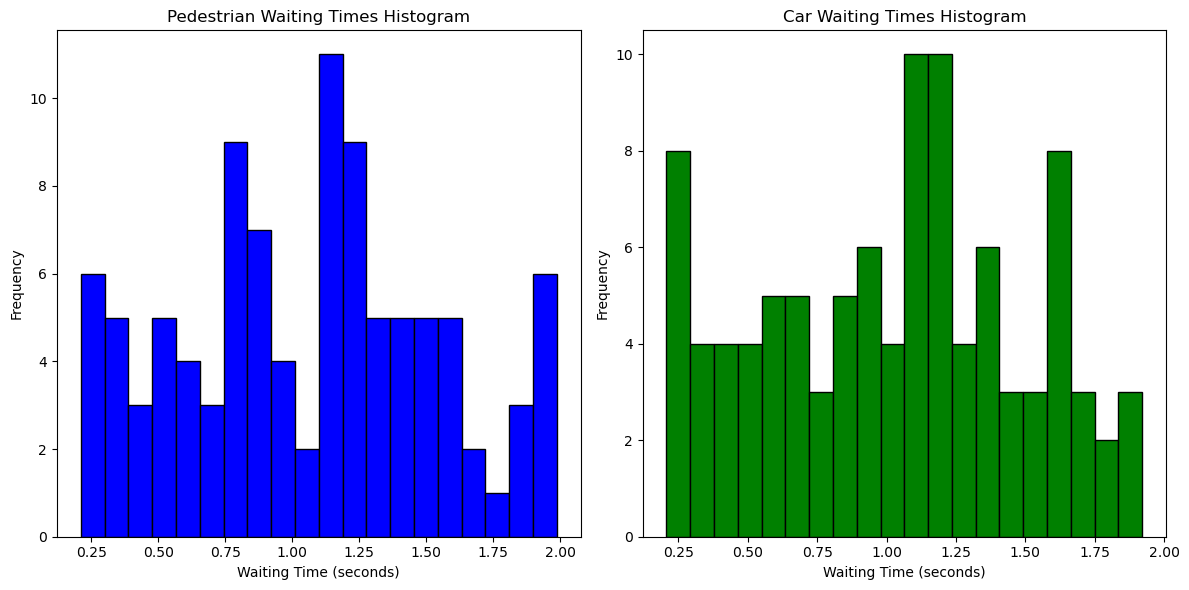

In [53]:
# Plot histograms
plt.figure(figsize=(12, 6))

        # Histogram for pedestrian waiting times
plt.subplot(1, 2, 1)
plt.hist(simulation.statistics['pedestrian_waiting_times'], bins=20, color='blue', edgecolor='black')
plt.title('Pedestrian Waiting Times Histogram')
plt.xlabel('Waiting Time (seconds)')
plt.ylabel('Frequency')

        # Histogram for car waiting times
plt.subplot(1, 2, 2)
plt.hist(simulation.statistics['car_waiting_times'], bins=20, color='green', edgecolor='black')
plt.title('Car Waiting Times Histogram')
plt.xlabel('Waiting Time (seconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

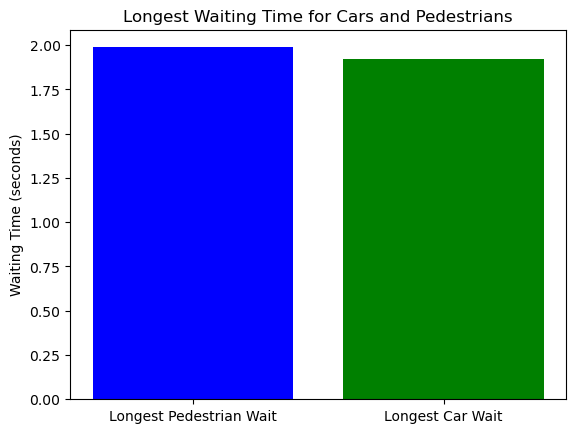

In [54]:
# Plot bar graph for longest waiting times
labels = ['Longest Pedestrian Wait', 'Longest Car Wait']
values = [longest_pedestrian_wait, longest_car_wait]

plt.bar(labels, values, color=['blue', 'green'])
plt.ylabel('Waiting Time (seconds)')
plt.title('Longest Waiting Time for Cars and Pedestrians')
plt.show()

Car 1 crossed the road at time 0.25
Pedestrian 1 crossed the road at time 0.55
Car 2 crossed the road at time 1.99
Pedestrian 2 crossed the road at time 2.08
Pedestrian 3 crossed the road at time 3.74
Car 3 crossed the road at time 3.91
Car 4 crossed the road at time 4.35
Pedestrian 4 crossed the road at time 4.52
Car 5 crossed the road at time 5.54
Pedestrian 5 crossed the road at time 6.29
Car 6 crossed the road at time 7.07
Pedestrian 6 crossed the road at time 7.88
Car 7 crossed the road at time 8.65
Pedestrian 7 crossed the road at time 9.18
Car 8 crossed the road at time 9.52
Car 9 crossed the road at time 10.92
Pedestrian 8 crossed the road at time 10.99
Car 10 crossed the road at time 11.73
Pedestrian 9 crossed the road at time 11.97
Pedestrian 10 crossed the road at time 12.39
Car 11 crossed the road at time 12.45
Car 12 crossed the road at time 12.78
Pedestrian 11 crossed the road at time 13.30
Car 13 crossed the road at time 14.01
Car 14 crossed the road at time 14.52
Pedest

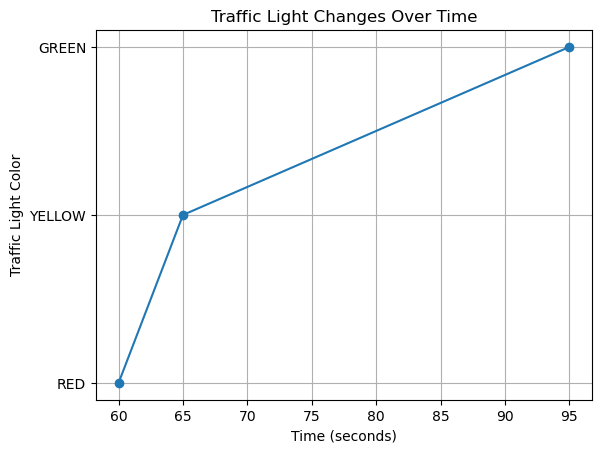

In [55]:
#Create an instance of the CrosswalkSimulation
simulation = CrosswalkSimulation()

# Run the simulation to obtain statistics
statistics = simulation.run_simulation(num_cars=100, num_pedestrians=100, simulation_time=120)

# Plot line graph for traffic light changes
light_colors, light_times = zip(*statistics['traffic_light_changes'])

plt.plot(light_times, light_colors, marker='o')
plt.yticks(['RED', 'YELLOW', 'GREEN'])
plt.xlabel('Time (seconds)')
plt.ylabel('Traffic Light Color')
plt.title('Traffic Light Changes Over Time')
plt.grid(True)
plt.show()

import simpy
import random

class Signal:
    RED = 0
    YELLOW = 1
    GREEN = 2

class CrosswalkSimulation:
    def __init__(self):
        self.env = simpy.Environment()
        self.qPedArr = simpy.Store(self.env)
        self.qPedXing = simpy.Store(self.env)
        self.qPedXed = simpy.Store(self.env)
        self.qPedLeave = simpy.Store(self.env)

        self.qCarArr = simpy.Store(self.env)
        self.qCarXing = simpy.Store(self.env)
        self.qCarXed = simpy.Store(self.env)

        self.walkToXing = (60, 120)
        self.walkAcross = (10, 20)
        self.walkAway = (120, 180)

        self.driveToXing = (5, 6)
        self.driveAway = (10, 12)

        self.pedestrianArrivalInterval = 60 / 10  # 10/min
        self.carArrivalInterval = 60 / 6  # 6/min

        self.cycle = {
            'red': 20,
            'yellow': 10,
            'green': 30,
        }
        self.light = Signal.RED

    def pedestrian(self, name):
        arrival_time = self.env.now

        # Walk to crosswalk
        walk_time = random.uniform(*self.walkToXing)
        yield self.env.timeout(walk_time)
        self.qPedArr.put((name, arrival_time))

        # Enter pedestrian crosswalk
        yield self.qPedXing.put((name, self.env.now))

        # Wait for green light
        while self.light != Signal.GREEN:
            yield self.env.timeout(1)

        # Leave crossing
        yield self.qPedXing.get()
        walk_across_time = random.uniform(*self.walkAcross)
        yield self.env.timeout(walk_across_time)
        yield self.qPedXed.put((name, self.env.now))

        # Walk away
        walk_away_time = random.uniform(*self.walkAway)
        yield self.env.timeout(walk_away_time)
        yield self.qPedLeave.put((name, self.env.now))

    def car(self, name):
        # Drive to crosswalk
        drive_time = random.uniform(*self.driveToXing)
        yield self.env.timeout(drive_time)
        self.qCarArr.put((name, self.env.now))

        # Enter crosswalk
        yield self.qCarXing.put((name, self.env.now))

        # Wait until red for pedestrians
        while self.light != Signal.RED:
            yield self.env.timeout(1)

        # Leave crosswalk
        yield self.qCarXing.get()
        drive_away_time = random.uniform(*self.driveAway)
        yield self.env.timeout(drive_away_time)
        yield self.qCarXed.put((name, self.env.now))

    def traffic_light(self):
        while True:
            # Turn green to allow pedestrians to cross
            self.set_light(Signal.GREEN)
            yield self.env.timeout(self.cycle['green'])

            # Turn yellow to clear pedestrians
            self.set_light(Signal.YELLOW)
            yield self.env.timeout(self.cycle['yellow'])

            # Turn red to allow cars to cross
            self.set_light(Signal.RED)
            yield self.env.timeout(self.cycle['red'])

    def set_light(self, value):
        self.light = value

    def run_simulation(self, num_pedestrians, num_cars, simulation_time):
        # Create pedestrian entities
        for i in range(1, num_pedestrians + 1):
            self.env.process(self.pedestrian(i))

        # Create car entities
        for i in range(1, num_cars + 1):
            self.env.process(self.car(i))

        # Start traffic light process
        self.env.process(self.traffic_light())

        # Run the simulation
        self.env.run(until=simulation_time)

# Example usage
simulation = CrosswalkSimulation()
simulation.run_simulation(num_pedestrians=5, num_cars=5, simulation_time=200)


In [63]:
# Extract data for plotting
pedestrian_crossings = statistics['pedestrian_crossings']
car_crossings = statistics['car_crossings']

# Plot line graphs for pedestrian and car crossings against time
ped_times = [time for _, time in pedestrian_crossings]
car_times = [time for _, time in car_crossings]

plt.plot2(ped_times, [1] * len(ped_times), 'ro', label='Pedestrian Crossings')
plt.plot2(car_times, [2] * len(car_times), 'bo', label='Car Crossings')

plt.yticks2([1, 2], ['Pedestrian', 'Car'])
plt.xlabel2('Time (seconds)')
plt.ylabel2('Crosswalk Crossings')
plt.title2('Pedestrian and Car Crossings Over Time')
plt.legend()
plt.grid(True)
plt.show()

TypeError: 'NoneType' object is not subscriptable

In [65]:
import simpy
import random
import matplotlib.pyplot as plt

class CrosswalkSimulation:
    def __init__(self):
        self.env = simpy.Environment()
        self.cycle = {
            'red': 60,
            'yellow': 5,
            'green': 30
        }
        self.qPedXing = simpy.Resource(self.env, capacity=1)
        self.qCarXing = simpy.Resource(self.env, capacity=1)
        self.statistics = {
            'pedestrian_waiting_times': [],
            'car_waiting_times': [],
            'system_times': [],
            'arrival_times': [],
            'traffic_light_changes': []
        }
        self.last_arrival_time = 0


    def pedestrian(self, name):
        arrival_time = self.env.now
        with self.qPedXing.request() as request:
            yield request
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            self.statistics['pedestrian_waiting_times'].append(waiting_time)
            self.statistics['system_times'].append(crossing_time)
            self.statistics['arrival_times'].append(arrival_time)
            print(f"Pedestrian {name} crossed the road at time {self.env.now:.2f}")
            print(f"Pedestrian {name} crossed the road at time {self.env.now:.2f}")
            self.statistics['pedestrian_crossings'].append(('Pedestrian', self.env.now))

    def car(self, name):
        arrival_time = self.env.now
        with self.qCarXing.request() as request:
            yield request
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            self.statistics['car_waiting_times'].append(waiting_time)
            self.statistics['system_times'].append(crossing_time)
            self.statistics['arrival_times'].append(arrival_time)
            print(f"Car {name} crossed the road at time {self.env.now:.2f}")
            print(f"Car {name} crossed the road at time {self.env.now:.2f}")
            self.statistics['car_crossings'].append(('Car', self.env.now))

    def traffic_light(self):
        while True:
            yield self.env.timeout(self.cycle['red'])
            print(f"Traffic light changed to RED at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('RED', self.env.now))
            
            yield self.env.timeout(self.cycle['yellow'])
            print(f"Traffic light changed to YELLOW at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('YELLOW', self.env.now))

            yield self.env.timeout(self.cycle['green'])
            print(f"Traffic light changed to GREEN at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('GREEN', self.env.now))

    def run_simulation(self, num_cars, num_pedestrians, simulation_time):
        pedestrian_id = 1
        car_id = 1

        for _ in range(num_cars):
            self.env.process(self.car(car_id))
            car_id += 1

        for _ in range(num_pedestrians):
            self.env.process(self.pedestrian(pedestrian_id))
            pedestrian_id += 1

        self.env.process(self.traffic_light())
        self.env.run(until=simulation_time)
        

        # Return the statistics for plotting
        return self.statistics

# Create an instance of the CrosswalkSimulation
simulation = CrosswalkSimulation()

# Run the simulation to obtain statistics
statistics = simulation.run_simulation(num_cars=100, num_pedestrians=100, simulation_time=120)

# Check if statistics is not None before extracting data for plotting
if statistics:
    # Extract data for plotting
    pedestrian_crossings = statistics['pedestrian_crossings']
    car_crossings = statistics['car_crossings']

    # Plot line graphs for pedestrian and car crossings against time
    ped_times = [time for _, time in pedestrian_crossings]
    car_times = [time for _, time in car_crossings]

    plt.plot(ped_times, [1] * len(ped_times), 'ro', label='Pedestrian Crossings')
    plt.plot(car_times, [2] * len(car_times), 'bo', label='Car Crossings')

    plt.yticks([1, 2], ['Pedestrian', 'Car'])
    plt.xlabel('Time (seconds)')
    plt.ylabel('Crosswalk Crossings')
    plt.title('Pedestrian and Car Crossings Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Simulation did not return valid statistics.")

Pedestrian 1 crossed the road at time 0.48
Pedestrian 1 crossed the road at time 0.48


KeyError: 'pedestrian_crossings'

Car 1 crossed the road at time 0.87
Pedestrian 1 crossed the road at time 1.48
Car 2 crossed the road at time 1.86
Pedestrian 2 crossed the road at time 2.29
Car 3 crossed the road at time 2.79
Car 4 crossed the road at time 3.60
Car 5 crossed the road at time 4.06
Pedestrian 3 crossed the road at time 4.11
Car 6 crossed the road at time 4.81
Pedestrian 4 crossed the road at time 5.23
Car 7 crossed the road at time 6.55
Pedestrian 5 crossed the road at time 7.21
Car 8 crossed the road at time 7.36
Car 9 crossed the road at time 8.23
Car 10 crossed the road at time 9.07
Pedestrian 6 crossed the road at time 9.10
Car 11 crossed the road at time 9.63
Pedestrian 7 crossed the road at time 9.78
Car 12 crossed the road at time 10.90
Pedestrian 8 crossed the road at time 11.70
Car 13 crossed the road at time 12.34
Pedestrian 9 crossed the road at time 13.34
Car 14 crossed the road at time 14.00
Pedestrian 10 crossed the road at time 15.22
Car 15 crossed the road at time 15.35
Pedestrian 11 cr

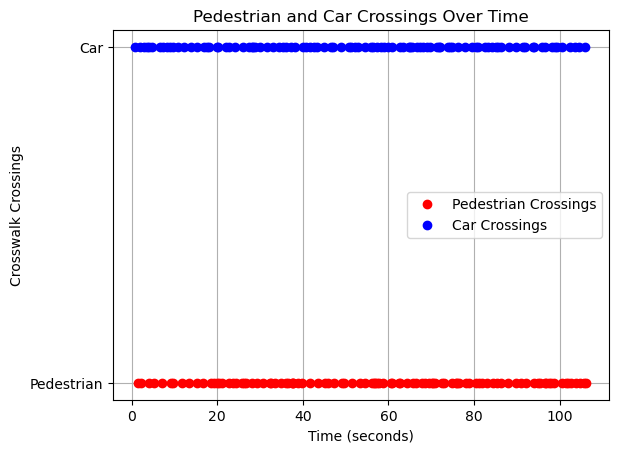

In [66]:
import simpy
import random
import matplotlib.pyplot as plt

class CrosswalkSimulation:
    def __init__(self):
        self.env = simpy.Environment()
        self.cycle = {
            'red': 60,
            'yellow': 5,
            'green': 30
        }
        self.qPedXing = simpy.Resource(self.env, capacity=1)
        self.qCarXing = simpy.Resource(self.env, capacity=1)
        self.statistics = {
            'pedestrian_waiting_times': [],
            'car_waiting_times': [],
            'system_times': [],
            'arrival_times': [],
            'traffic_light_changes': [],
            'pedestrian_crossings': [],  # Initialize the list
            'car_crossings': []  # Initialize the list
        }
        self.last_arrival_time = 0

    def pedestrian(self, name):
        arrival_time = self.env.now
        with self.qPedXing.request() as request:
            yield request
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            self.statistics['pedestrian_waiting_times'].append(waiting_time)
            self.statistics['system_times'].append(crossing_time)
            self.statistics['arrival_times'].append(arrival_time)
            print(f"Pedestrian {name} crossed the road at time {self.env.now:.2f}")
            self.statistics['pedestrian_crossings'].append(('Pedestrian', self.env.now))

    def car(self, name):
        arrival_time = self.env.now
        with self.qCarXing.request() as request:
            yield request
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            self.statistics['car_waiting_times'].append(waiting_time)
            self.statistics['system_times'].append(crossing_time)
            self.statistics['arrival_times'].append(arrival_time)
            print(f"Car {name} crossed the road at time {self.env.now:.2f}")
            self.statistics['car_crossings'].append(('Car', self.env.now))

    def traffic_light(self):
        while True:
            yield self.env.timeout(self.cycle['red'])
            print(f"Traffic light changed to RED at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('RED', self.env.now))
            
            yield self.env.timeout(self.cycle['yellow'])
            print(f"Traffic light changed to YELLOW at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('YELLOW', self.env.now))

            yield self.env.timeout(self.cycle['green'])
            print(f"Traffic light changed to GREEN at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('GREEN', self.env.now))

    def run_simulation(self, num_cars, num_pedestrians, simulation_time):
        pedestrian_id = 1
        car_id = 1

        for _ in range(num_cars):
            self.env.process(self.car(car_id))
            car_id += 1

        for _ in range(num_pedestrians):
            self.env.process(self.pedestrian(pedestrian_id))
            pedestrian_id += 1

        self.env.process(self.traffic_light())
        self.env.run(until=simulation_time)

        # Return the statistics for plotting
        return self.statistics

# Create an instance of the CrosswalkSimulation
simulation = CrosswalkSimulation()

# Run the simulation to obtain statistics
statistics = simulation.run_simulation(num_cars=100, num_pedestrians=100, simulation_time=120)

# Check if statistics is not None before extracting data for plotting
if statistics:
    # Extract data for plotting
    pedestrian_crossings = statistics['pedestrian_crossings']
    car_crossings = statistics['car_crossings']

    # Plot line graphs for pedestrian and car crossings against time
    ped_times = [time for _, time in pedestrian_crossings]
    car_times = [time for _, time in car_crossings]

    plt.plot(ped_times, [1] * len(ped_times), 'ro', label='Pedestrian Crossings')
    plt.plot(car_times, [2] * len(car_times), 'bo', label='Car Crossings')

    plt.yticks([1, 2], ['Pedestrian', 'Car'])
    plt.xlabel('Time (seconds)')
    plt.ylabel('Crosswalk Crossings')
    plt.title('Pedestrian and Car Crossings Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Simulation did not return valid statistics.")


In [67]:
import simpy
import random

class CrosswalkSimulation:
    def __init__(self):
        self.env = simpy.Environment()
        self.cycle = {
            'red': 60,
            'yellow': 5,
            'green': 30
        }
        self.qPedXing = simpy.Resource(self.env, capacity=1)
        self.qCarXing = simpy.Resource(self.env, capacity=1)
        self.statistics = {
            'pedestrian_waiting_times': [],
            'car_waiting_times': [],
            'system_times': [],
            'arrival_times': [],
            'traffic_light_changes': [],
            'queue_lengths': []  # Added to collect queue lengths
        }
        self.last_arrival_time = 0

    def pedestrian(self, name):
        arrival_time = self.env.now
        with self.qPedXing.request() as request:
            yield request
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            self.statistics['pedestrian_waiting_times'].append(waiting_time)
            self.statistics['system_times'].append(crossing_time)
            self.statistics['arrival_times'].append(arrival_time)
            print(f"Pedestrian {name} crossed the road at time {self.env.now:.2f}")
            self.statistics['queue_lengths'].append((self.env.now, len(self.qPedXing.queue)))

    def car(self, name):
        arrival_time = self.env.now
        with self.qCarXing.request() as request:
            yield request
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            self.statistics['car_waiting_times'].append(waiting_time)
            self.statistics['system_times'].append(crossing_time)
            self.statistics['arrival_times'].append(arrival_time)
            print(f"Car {name} crossed the road at time {self.env.now:.2f}")
            self.statistics['queue_lengths'].append((self.env.now, len(self.qCarXing.queue)))

    def traffic_light(self):
        while True:
            yield self.env.timeout(self.cycle['red'])
            print(f"Traffic light changed to RED at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('RED', self.env.now))
            
            yield self.env.timeout(self.cycle['yellow'])
            print(f"Traffic light changed to YELLOW at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('YELLOW', self.env.now))

            yield self.env.timeout(self.cycle['green'])
            print(f"Traffic light changed to GREEN at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('GREEN', self.env.now))

    def run_simulation(self, num_cars, num_pedestrians, simulation_time):
        pedestrian_id = 1
        car_id = 1

        for _ in range(num_cars):
            self.env.process(self.car(car_id))
            car_id += 1

        for _ in range(num_pedestrians):
            self.env.process(self.pedestrian(pedestrian_id))
            pedestrian_id += 1

        self.env.process(self.traffic_light())
        self.env.run(until=simulation_time)

        # Return the statistics for further analysis
        return self.statistics

# Create an instance of the CrosswalkSimulation
simulation = CrosswalkSimulation()

# Run the simulation to obtain statistics
statistics = simulation.run_simulation(num_cars=100, num_pedestrians=100, simulation_time=120)

# Print queue lengths at different time points
print("Queue Lengths:")
for time, length in statistics['queue_lengths']:
    print(f"At time {time:.2f}, queue length: {length}")


Pedestrian 1 crossed the road at time 1.14
Car 1 crossed the road at time 1.44
Pedestrian 2 crossed the road at time 1.91
Pedestrian 3 crossed the road at time 2.76
Car 2 crossed the road at time 3.28
Car 3 crossed the road at time 3.80
Car 4 crossed the road at time 4.55
Pedestrian 4 crossed the road at time 4.64
Pedestrian 5 crossed the road at time 5.93
Pedestrian 6 crossed the road at time 6.36
Car 5 crossed the road at time 6.51
Car 6 crossed the road at time 6.90
Pedestrian 7 crossed the road at time 7.69
Pedestrian 8 crossed the road at time 8.72
Car 7 crossed the road at time 8.80
Pedestrian 9 crossed the road at time 9.40
Pedestrian 10 crossed the road at time 9.87
Car 8 crossed the road at time 10.06
Pedestrian 11 crossed the road at time 11.28
Car 9 crossed the road at time 11.37
Car 10 crossed the road at time 12.26
Pedestrian 12 crossed the road at time 12.84
Car 11 crossed the road at time 13.39
Car 12 crossed the road at time 14.41
Pedestrian 13 crossed the road at time 

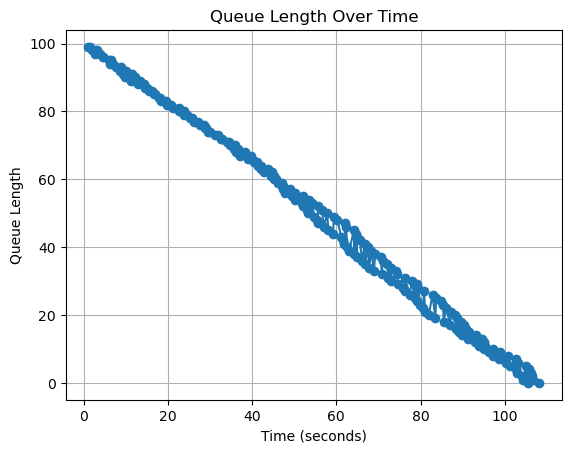

In [68]:
import matplotlib.pyplot as plt

# Extract data for plotting
queue_lengths = statistics['queue_lengths']
times, lengths = zip(*queue_lengths)

# Plot line graph for queue lengths
plt.plot(times, lengths, marker='o')
plt.xlabel('Time (seconds)')
plt.ylabel('Queue Length')
plt.title('Queue Length Over Time')
plt.grid(True)
plt.show()


In [70]:
import simpy
import random

class CrosswalkSimulation:
    def __init__(self):
        self.env = simpy.Environment()
        self.cycle = {
            'red': 60,
            'yellow': 5,
            'green': 30
        }
        self.qPedXing = simpy.Resource(self.env, capacity=1)
        self.qCarXing = simpy.Resource(self.env, capacity=1)
        self.statistics = {
            'pedestrian_waiting_times': [],
            'car_waiting_times': [],
            'system_times': [],
            'arrival_times': [],
            'traffic_light_changes': [],
            'pedestrian_queue_length': [],  # New statistic
            'car_queue_length': []  # New statistic
        }
        self.last_arrival_time = 0

    def pedestrian(self, name):
        arrival_time = self.env.now
        with self.qPedXing.request() as request:
            yield request
            # Record the queue length when a pedestrian starts crossing
            self.statistics['pedestrian_queue_length'].append(len(self.qPedXing.queue))
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            self.statistics['pedestrian_waiting_times'].append(waiting_time)
            self.statistics['system_times'].append(crossing_time)
            self.statistics['arrival_times'].append(arrival_time)
            print(f"Pedestrian {name} crossed the road at time {self.env.now:.2f}")

    def car(self, name):
        arrival_time = self.env.now
        with self.qCarXing.request() as request:
            yield request
            # Record the queue length when a car starts crossing
            self.statistics['car_queue_length'].append(len(self.qCarXing.queue))
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            self.statistics['car_waiting_times'].append(waiting_time)
            self.statistics['system_times'].append(crossing_time)
            self.statistics['arrival_times'].append(arrival_time)
            print(f"Car {name} crossed the road at time {self.env.now:.2f}")

    def traffic_light(self):
        while True:
            yield self.env.timeout(self.cycle['red'])
            print(f"Traffic light changed to RED at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('RED', self.env.now))
            
            yield self.env.timeout(self.cycle['yellow'])
            print(f"Traffic light changed to YELLOW at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('YELLOW', self.env.now))

            yield self.env.timeout(self.cycle['green'])
            print(f"Traffic light changed to GREEN at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('GREEN', self.env.now))

    def run_simulation(self, num_cars, num_pedestrians, simulation_time):
        pedestrian_id = 1
        car_id = 1

        for _ in range(num_cars):
            self.env.process(self.car(car_id))
            car_id += 1

        for _ in range(num_pedestrians):
            self.env.process(self.pedestrian(pedestrian_id))
            pedestrian_id += 1

        self.env.process(self.traffic_light())
        self.env.run(until=simulation_time)
        
        return self.statistics


# Test Method
simulation = CrosswalkSimulation()
simulation.run_simulation(num_cars=100, num_pedestrians=100, simulation_time=120)

# Display queue length statistics
avg_pedestrian_queue_length = sum(simulation.statistics['pedestrian_queue_length']) / len(simulation.statistics['pedestrian_queue_length'])
avg_car_queue_length = sum(simulation.statistics['car_queue_length']) / len(simulation.statistics['car_queue_length'])

print("\nQueue Length Statistics:")
print(f"Average Pedestrian Queue Length: {avg_pedestrian_queue_length:.2f}")
print(f"Average Car Queue Length: {avg_car_queue_length:.2f}")


Pedestrian 1 crossed the road at time 1.05
Car 1 crossed the road at time 1.74
Pedestrian 2 crossed the road at time 2.30
Pedestrian 3 crossed the road at time 2.92
Car 2 crossed the road at time 3.25
Car 3 crossed the road at time 3.48
Car 4 crossed the road at time 4.43
Pedestrian 4 crossed the road at time 4.77
Pedestrian 5 crossed the road at time 5.86
Car 5 crossed the road at time 5.97
Car 6 crossed the road at time 6.65
Pedestrian 6 crossed the road at time 6.92
Car 7 crossed the road at time 7.12
Car 8 crossed the road at time 7.83
Pedestrian 7 crossed the road at time 8.46
Car 9 crossed the road at time 9.48
Pedestrian 8 crossed the road at time 9.93
Car 10 crossed the road at time 9.94
Pedestrian 9 crossed the road at time 10.46
Car 11 crossed the road at time 11.08
Car 12 crossed the road at time 11.34
Pedestrian 10 crossed the road at time 11.76
Pedestrian 11 crossed the road at time 12.55
Car 13 crossed the road at time 12.63
Pedestrian 12 crossed the road at time 13.53
Ca

In [73]:
import simpy
import random

class CrosswalkSimulation:
    def __init__(self):
        self.env = simpy.Environment()
        self.cycle = {
            'red': 60,
            'yellow': 5,
            'green': 30
        }
        self.qPedXing = simpy.Resource(self.env, capacity=1)
        self.qCarXing = simpy.Resource(self.env, capacity=1)
        self.statistics = {
            'pedestrian_waiting_times': [],
            'car_waiting_times': [],
            'pedestrian_crossing_times': [],
            'car_crossing_times': [],
            'pedestrian_system_times': [],
            'car_system_times': [],
            'interarrival_times_pedestrians': [],
            'interarrival_times_cars': [],
            'utilization_ws': 0,
            'queue_length_pedestrians': [],
            'queue_length_cars': [],
            'traffic_light_changes': [],
            'longest_pedestrian_wait': 0,
            'longest_car_wait': 0
        }
        self.last_arrival_time = 0

    def pedestrian(self, name):
        arrival_time = self.env.now
        with self.qPedXing.request() as request:
            yield request
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            system_time = waiting_time + crossing_time

            # Update statistics
            self.statistics['pedestrian_waiting_times'].append(waiting_time)
            self.statistics['pedestrian_crossing_times'].append(crossing_time)
            self.statistics['pedestrian_system_times'].append(system_time)
            self.statistics['queue_length_pedestrians'].append(len(self.qPedXing.queue))

            # Update longest wait time
            self.statistics['longest_pedestrian_wait'] = max(self.statistics['longest_pedestrian_wait'], waiting_time)

            print(f"Pedestrian {name} crossed the road at time {self.env.now:.2f}")

    def car(self, name):
        arrival_time = self.env.now
        with self.qCarXing.request() as request:
            yield request
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            system_time = waiting_time + crossing_time

            # Update statistics
            self.statistics['car_waiting_times'].append(waiting_time)
            self.statistics['car_crossing_times'].append(crossing_time)
            self.statistics['car_system_times'].append(system_time)
            self.statistics['queue_length_cars'].append(len(self.qCarXing.queue))

            # Update longest wait time
            self.statistics['longest_car_wait'] = max(self.statistics['longest_car_wait'], waiting_time)

            print(f"Car {name} crossed the road at time {self.env.now:.2f}")

    def traffic_light(self):
        while True:
            yield self.env.timeout(self.cycle['red'])
            print(f"Traffic light changed to RED at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('RED', self.env.now))
            
            yield self.env.timeout(self.cycle['yellow'])
            print(f"Traffic light changed to YELLOW at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('YELLOW', self.env.now))

            yield self.env.timeout(self.cycle['green'])
            print(f"Traffic light changed to GREEN at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('GREEN', self.env.now))

    def run_simulation(self, num_cars, num_pedestrians, simulation_time):
        pedestrian_id = 1
        car_id = 1

        for _ in range(num_cars):
            self.env.process(self.car(car_id))
            car_id += 1

        for _ in range(num_pedestrians):
            self.env.process(self.pedestrian(pedestrian_id))
            pedestrian_id += 1

        self.env.process(self.traffic_light())
        self.env.run(until=simulation_time)
        
        # Calculate utilization
        self.statistics['utilization_ws'] = sum(self.statistics['car_system_times'] + self.statistics['pedestrian_system_times']) / simulation_time

        return self.statistics


# Test Method
simulation = CrosswalkSimulation()
statistics = simulation.run_simulation(num_cars=100, num_pedestrians=120, simulation_time=120)

# Display statistics
avg_pedestrian_waiting_time = sum(statistics['pedestrian_waiting_times']) / len(statistics['pedestrian_waiting_times'])
avg_car_waiting_time = sum(statistics['car_waiting_times']) / len(statistics['car_waiting_times'])
avg_pedestrian_crossing_time = sum(statistics['pedestrian_crossing_times']) / len(statistics['pedestrian_crossing_times'])
avg_car_crossing_time = sum(statistics['car_crossing_times']) / len(statistics['car_crossing_times'])
avg_pedestrian_system_time = sum(statistics['pedestrian_system_times']) / len(statistics['pedestrian_system_times'])
avg_car_system_time = sum(statistics['car_system_times']) / len(statistics['car_system_times'])
avg_interarrival_time_pedestrians = sum(statistics['interarrival_times_pedestrians']) / len(statistics['interarrival_times_pedestrians'])
avg_interarrival_time_cars = sum(statistics['interarrival_times_cars']) / len(statistics['interarrival_times_cars'])
avg_queue_length_pedestrians = sum(statistics['queue_length_pedestrians']) / len(statistics['queue_length_pedestrians'])
avg_queue_length_cars = sum(statistics['queue_length_cars']) / len(statistics['queue_length_cars'])

print("\nSimulation Statistics:")
print(f"Average Pedestrian Waiting Time: {avg_pedestrian_waiting_time:.2f} seconds")
print(f"Average Car Waiting Time: {avg_car_waiting_time:.2f} seconds")
print(f"Average Pedestrian Crossing Time: {avg_pedestrian_crossing_time:.2f} seconds")
print(f"Average Car Crossing Time: {avg_car_crossing_time:.2f} seconds")
print(f"Average Pedestrian System Time: {avg_pedestrian_system_time:.2f} seconds")
print(f"Average Car System Time: {avg_car_system_time:.2f} seconds")
print(f"Average Interarrival Time of Pedestrians: {avg_interarrival_time_pedestrians:.2f} seconds")
print(f"Average Interarrival Time of Cars: {avg_interarrival_time_cars:.2f} seconds")
print(f"Utilization (WS): {statistics['utilization_ws']:.2%}")
print(f"Average Queue Length of Pedestrians: {avg_queue_length_pedestrians:.2f}")
print(f"Average Queue Length of Cars: {avg_queue_length_cars:.2f}")
print(f"Longest Pedestrian Wait: {statistics['longest_pedestrian_wait']:.2f} seconds")
print(f"Longest Car Wait: {statistics['longest_car_wait']:.2f} seconds")


Pedestrian 1 crossed the road at time 1.63
Car 1 crossed the road at time 1.87
Pedestrian 2 crossed the road at time 3.04
Car 2 crossed the road at time 3.65
Pedestrian 3 crossed the road at time 3.80
Car 3 crossed the road at time 4.20
Pedestrian 4 crossed the road at time 4.47
Car 4 crossed the road at time 4.69
Car 5 crossed the road at time 5.35
Car 6 crossed the road at time 6.20
Pedestrian 5 crossed the road at time 6.45
Pedestrian 6 crossed the road at time 7.73
Car 7 crossed the road at time 8.02
Pedestrian 7 crossed the road at time 8.92
Car 8 crossed the road at time 9.41
Pedestrian 8 crossed the road at time 9.63
Car 9 crossed the road at time 9.79
Pedestrian 9 crossed the road at time 10.80
Car 10 crossed the road at time 11.70
Pedestrian 10 crossed the road at time 11.97
Car 11 crossed the road at time 13.25
Pedestrian 11 crossed the road at time 13.80
Car 12 crossed the road at time 14.29
Car 13 crossed the road at time 15.06
Pedestrian 12 crossed the road at time 15.34
P

ZeroDivisionError: division by zero

In [74]:
import simpy
import random

class CrosswalkSimulation:
    def __init__(self):
        self.env = simpy.Environment()
        self.cycle = {
            'red': 60,
            'yellow': 5,
            'green': 30
        }
        self.qPedXing = simpy.Resource(self.env, capacity=1)
        self.qCarXing = simpy.Resource(self.env, capacity=1)
        self.statistics = {
            'pedestrian_waiting_times': [],
            'car_waiting_times': [],
            'pedestrian_crossing_times': [],
            'car_crossing_times': [],
            'pedestrian_system_times': [],
            'car_system_times': [],
            'interarrival_times_pedestrians': [],
            'interarrival_times_cars': [],
            'utilization_ws': 0,
            'queue_length_pedestrians': [],
            'queue_length_cars': [],
            'traffic_light_changes': [],
            'longest_pedestrian_wait': 0,
            'longest_car_wait': 0
        }
        self.last_arrival_time = 0

    def pedestrian(self, name):
        arrival_time = self.env.now
        with self.qPedXing.request() as request:
            yield request
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            system_time = waiting_time + crossing_time

            # Update statistics
            self.statistics['pedestrian_waiting_times'].append(waiting_time)
            self.statistics['pedestrian_crossing_times'].append(crossing_time)
            self.statistics['pedestrian_system_times'].append(system_time)
            self.statistics['queue_length_pedestrians'].append(len(self.qPedXing.queue))

            # Update longest wait time
            self.statistics['longest_pedestrian_wait'] = max(self.statistics['longest_pedestrian_wait'], waiting_time)

            print(f"Pedestrian {name} crossed the road at time {self.env.now:.2f}")

    def car(self, name):
        arrival_time = self.env.now
        with self.qCarXing.request() as request:
            yield request
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            system_time = waiting_time + crossing_time

            # Update statistics
            self.statistics['car_waiting_times'].append(waiting_time)
            self.statistics['car_crossing_times'].append(crossing_time)
            self.statistics['car_system_times'].append(system_time)
            self.statistics['queue_length_cars'].append(len(self.qCarXing.queue))

            # Update longest wait time
            self.statistics['longest_car_wait'] = max(self.statistics['longest_car_wait'], waiting_time)

            print(f"Car {name} crossed the road at time {self.env.now:.2f}")

    def traffic_light(self):
        while True:
            yield self.env.timeout(self.cycle['red'])
            print(f"Traffic light changed to RED at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('RED', self.env.now))
            
            yield self.env.timeout(self.cycle['yellow'])
            print(f"Traffic light changed to YELLOW at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('YELLOW', self.env.now))

            yield self.env.timeout(self.cycle['green'])
            print(f"Traffic light changed to GREEN at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('GREEN', self.env.now))

    def run_simulation(self, num_cars, num_pedestrians, simulation_time):
        pedestrian_id = 1
        car_id = 1

        for _ in range(num_cars):
            self.env.process(self.car(car_id))
            car_id += 1

        for _ in range(num_pedestrians):
            self.env.process(self.pedestrian(pedestrian_id))
            pedestrian_id += 1

        self.env.process(self.traffic_light())
        self.env.run(until=simulation_time)
        
        # Calculate utilization
        total_system_times = self.statistics['car_system_times'] + self.statistics['pedestrian_system_times']
        self.statistics['utilization_ws'] = sum(total_system_times) / simulation_time

        return self.statistics


# Test Method
simulation = CrosswalkSimulation()
statistics = simulation.run_simulation(num_cars=100, num_pedestrians=100, simulation_time=120)

# Display statistics
avg_pedestrian_waiting_time = sum(statistics['pedestrian_waiting_times']) / len(statistics['pedestrian_waiting_times'])
avg_car_waiting_time = sum(statistics['car_waiting_times']) / len(statistics['car_waiting_times'])
avg_pedestrian_crossing_time = sum(statistics['pedestrian_crossing_times']) / len(statistics['pedestrian_crossing_times'])
avg_car_crossing_time = sum(statistics['car_crossing_times']) / len(statistics['car_crossing_times'])
avg_pedestrian_system_time = sum(statistics['pedestrian_system_times']) / len(statistics['pedestrian_system_times'])
avg_car_system_time = sum(statistics['car_system_times']) / len(statistics['car_system_times'])

if len(statistics['interarrival_times_pedestrians']) > 0:
    avg_interarrival_time_pedestrians = sum(statistics['interarrival_times_pedestrians']) / len(statistics['interarrival_times_pedestrians'])
else:
    avg_interarrival_time_pedestrians = 0

if len(statistics['interarrival_times_cars']) > 0:
    avg_interarrival_time_cars = sum(statistics['interarrival_times_cars']) / len(statistics['interarrival_times_cars'])
else:
    avg_interarrival_time_cars = 0

avg_queue_length_pedestrians = sum(statistics['queue_length_pedestrians']) / len(statistics['queue_length_pedestrians'])
avg_queue_length_cars = sum(statistics['queue_length_cars']) / len(statistics['queue_length_cars'])

print("\nSimulation Statistics:")
print(f"Average Pedestrian Waiting Time: {avg_pedestrian_waiting_time:.2f} seconds")
print(f"Average Car Waiting Time: {avg_car_waiting_time:.2f} seconds")
print(f"Average Pedestrian Crossing Time: {avg_pedestrian_crossing_time:.2f} seconds")
print(f"Average Car Crossing Time: {avg_car_crossing_time:.2f} seconds")
print(f"Average Pedestrian System Time: {avg_pedestrian_system_time:.2f} seconds")
print(f"Average Car System Time: {avg_car_system_time:.2f} seconds")
print(f"Average Interarrival Time of Pedestrians: {avg_interarrival_time_pedestrians:.2f} seconds")
print(f"Average Interarrival Time of Cars: {avg_interarrival_time_cars:.2f} seconds")
print(f"Utilization (WS): {statistics['utilization_ws']:.2%}")
print(f"Average Queue Length of Pedestrians: {avg_queue_length_pedestrians:.2f}")
print(f"Average Queue Length of Cars: {avg_queue_length_cars:.2f}")
print(f"Longest Pedestrian Wait: {statistics['longest_pedestrian_wait']:.2f} seconds")
print(f"Longest Car Wait: {statistics['longest_car_wait']:.2f} seconds")


Car 1 crossed the road at time 0.50
Car 2 crossed the road at time 0.81
Car 3 crossed the road at time 1.64
Pedestrian 1 crossed the road at time 1.64
Car 4 crossed the road at time 2.05
Pedestrian 2 crossed the road at time 2.55
Pedestrian 3 crossed the road at time 3.23
Pedestrian 4 crossed the road at time 3.78
Car 5 crossed the road at time 3.89
Pedestrian 5 crossed the road at time 4.54
Car 6 crossed the road at time 4.85
Pedestrian 6 crossed the road at time 6.02
Car 7 crossed the road at time 6.21
Car 8 crossed the road at time 7.20
Pedestrian 7 crossed the road at time 7.42
Pedestrian 8 crossed the road at time 8.25
Car 9 crossed the road at time 8.56
Car 10 crossed the road at time 8.92
Pedestrian 9 crossed the road at time 10.01
Car 11 crossed the road at time 10.25
Pedestrian 10 crossed the road at time 11.26
Car 12 crossed the road at time 11.58
Pedestrian 11 crossed the road at time 12.45
Car 13 crossed the road at time 12.88
Car 14 crossed the road at time 13.32
Pedestria

In [75]:
import numpy as np

# Extract waiting times for pedestrians and cars
pedestrian_waiting_times = np.array(statistics['pedestrian_waiting_times'])
car_waiting_times = np.array(statistics['car_waiting_times'])

# Calculate mean and variance for pedestrian waiting times
mean_pedestrian_waiting_time = np.mean(pedestrian_waiting_times)
variance_pedestrian_waiting_time = np.var(pedestrian_waiting_times)

# Calculate mean and variance for car waiting times
mean_car_waiting_time = np.mean(car_waiting_times)
variance_car_waiting_time = np.var(car_waiting_times)

# Print the results
print("\nWaiting Time Statistics:")
print(f"Mean Pedestrian Waiting Time: {mean_pedestrian_waiting_time:.2f} seconds")
print(f"Variance Pedestrian Waiting Time: {variance_pedestrian_waiting_time:.2f} seconds^2")
print(f"Mean Car Waiting Time: {mean_car_waiting_time:.2f} seconds")
print(f"Variance Car Waiting Time: {variance_car_waiting_time:.2f} seconds^2")



Waiting Time Statistics:
Mean Pedestrian Waiting Time: 1.09 seconds
Variance Pedestrian Waiting Time: 0.25 seconds^2
Mean Car Waiting Time: 1.06 seconds
Variance Car Waiting Time: 0.29 seconds^2


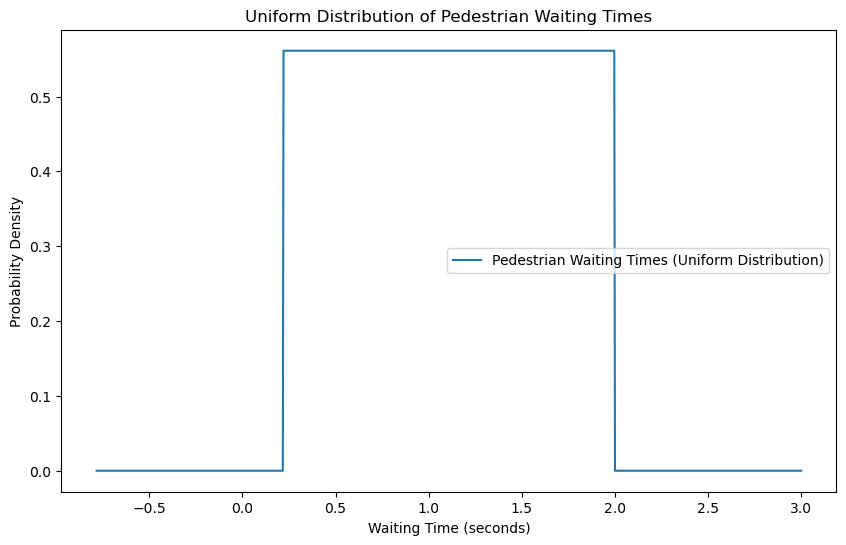

In [76]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters for the uniform distribution
a_pedestrian = np.min(pedestrian_waiting_times)
b_pedestrian = np.max(pedestrian_waiting_times)

# Create a range of values for the x-axis
x_values = np.linspace(a_pedestrian - 1, b_pedestrian + 1, 1000)

# Calculate the PDF using the uniform distribution formula
pdf_pedestrian = stats.uniform.pdf(x_values, loc=a_pedestrian, scale=(b_pedestrian - a_pedestrian))

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.plot(x_values, pdf_pedestrian, label='Pedestrian Waiting Times (Uniform Distribution)')
plt.title('Uniform Distribution of Pedestrian Waiting Times')
plt.xlabel('Waiting Time (seconds)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


In [77]:
import scipy.stats as stats

# Assuming you have statistics from your simulation
car_system_times = statistics['car_system_times']
pedestrian_system_times = statistics['pedestrian_system_times']

# Confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate confidence interval for car system times
car_ci = stats.t.interval(confidence_level, len(car_system_times) - 1, loc=np.mean(car_system_times), scale=stats.sem(car_system_times))

# Calculate confidence interval for pedestrian system times
pedestrian_ci = stats.t.interval(confidence_level, len(pedestrian_system_times) - 1, loc=np.mean(pedestrian_system_times), scale=stats.sem(pedestrian_system_times))

# Print the results
print(f"Confidence Interval for Car System Times (95%): {car_ci}")
print(f"Confidence Interval for Pedestrian System Times (95%): {pedestrian_ci}")


Confidence Interval for Car System Times (95%): (48.93976673861372, 61.41036813001623)
Confidence Interval for Pedestrian System Times (95%): (49.56743685503846, 62.43181722208529)


KeyError: 'arrival_times'

Pedestrian Arrival Intervals (minutes): [1.31640207e-01 3.02894999e-02 8.46395351e-02 1.83687926e-01
 1.24223843e-04 2.36431483e-01 8.15601645e-02 1.47809004e-02
 1.94697485e-02 6.06859567e-02]
Car Arrival Intervals (minutes): [0.35562861 0.34182397 0.74784002 0.30356207 0.11791099 0.21373419
 0.1003005  0.10627539 0.02183165 0.46113649]
Pedestrian Arrival Intervals (seconds): [7.89841245e+00 1.81736999e+00 5.07837211e+00 1.10212755e+01
 7.45343057e-03 1.41858890e+01 4.89360987e+00 8.86854024e-01
 1.16818491e+00 3.64115740e+00]
Car Arrival Intervals (seconds): [21.3377163  20.50943795 44.87040107 18.21372424  7.07465949 12.82405138
  6.01803003  6.37652321  1.30989875 27.66818916]


KeyError: 'arrival_times'